In [1]:
from google.colab import drive
drive.mount("/content/mydrive/")
%cd /content/mydrive/MyDrive/LTSF_Linear

import os
import json
from glob import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from _data_provider.data_loader_wq import get_ydata

root_path = "dataset/Water_Week"
dir_list = sorted(os.listdir(root_path))

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).
/content/mydrive/MyDrive/LTSF_Linear


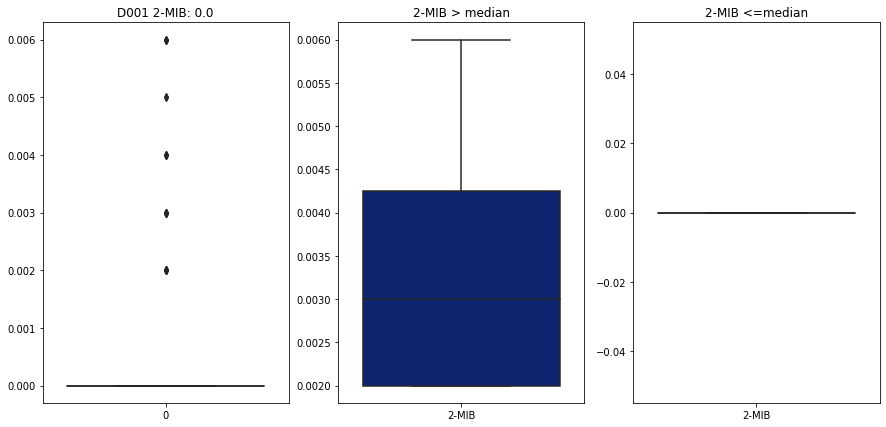

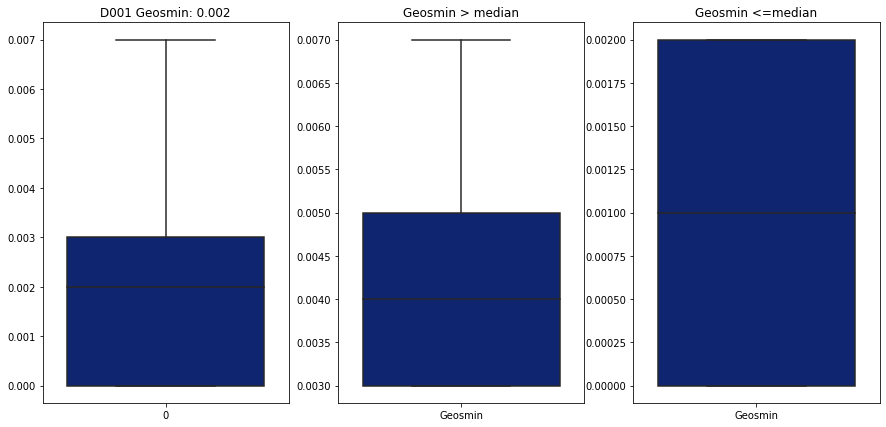

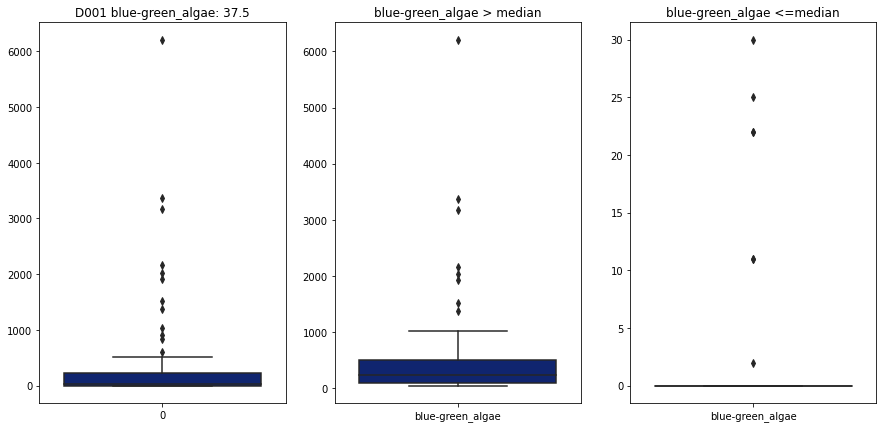

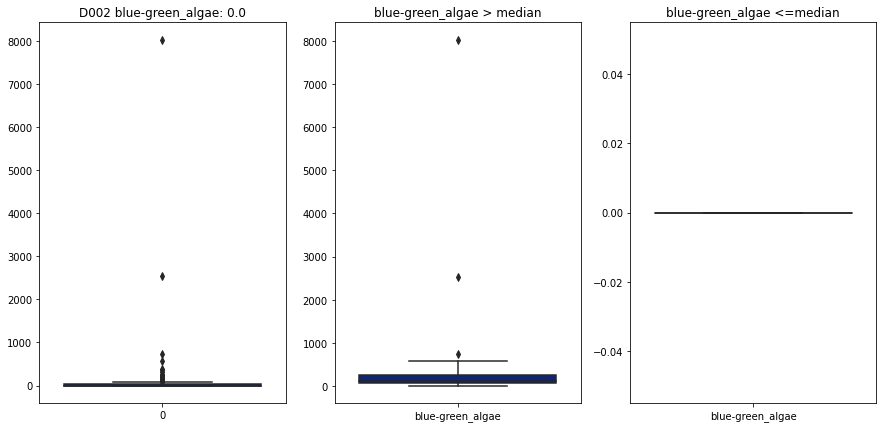

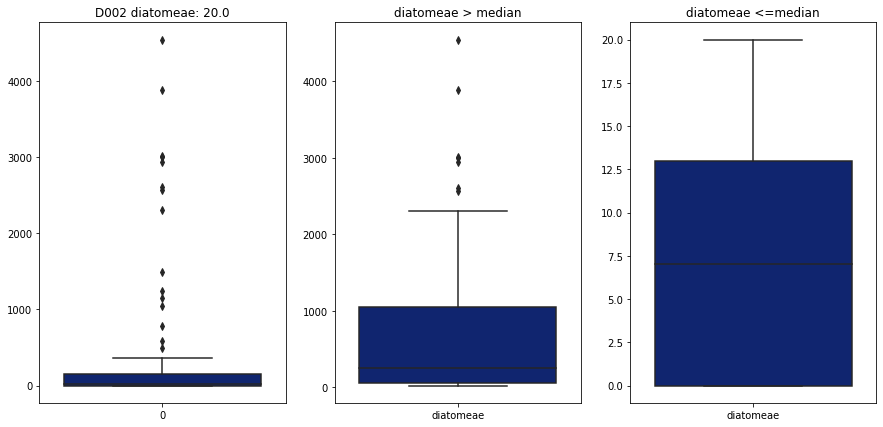

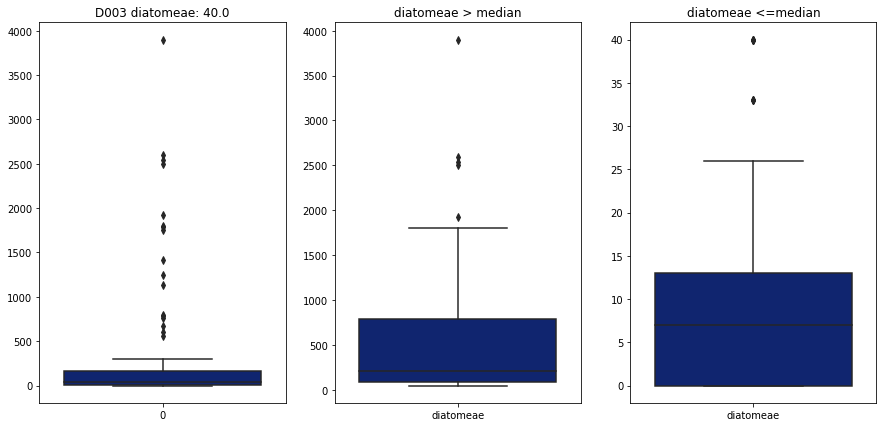

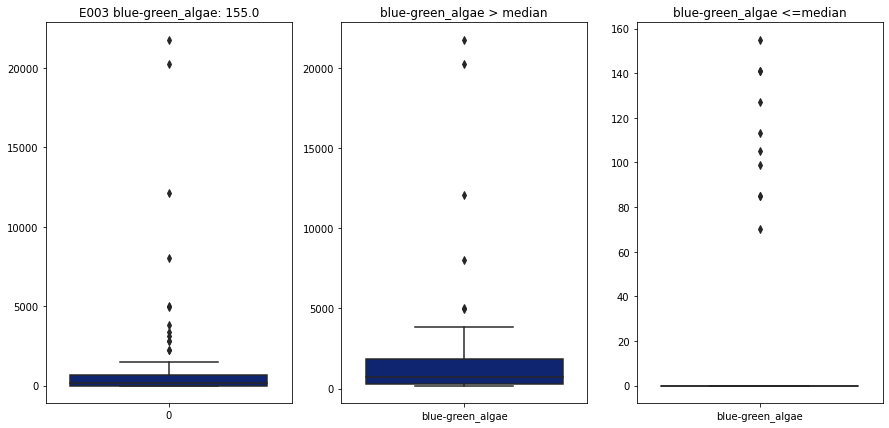

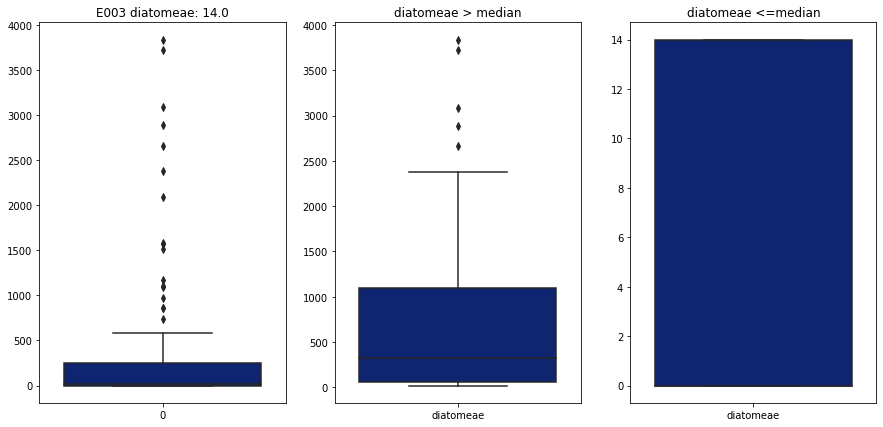

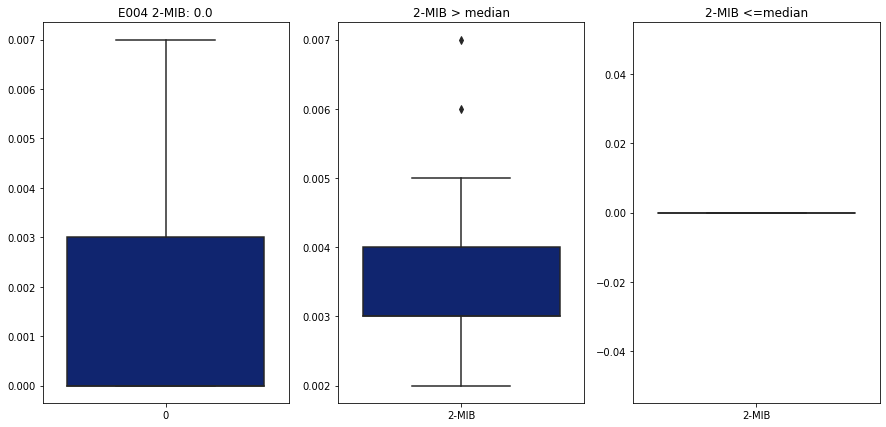

In [2]:
mape_dic = {'D001청주정': ["2-MIB", "Geosmin", "blue-green_algae"],
             'D002구미': ["blue-green_algae", "diatomeae"],
             'D003고령': ["diatomeae"],
             'E003본포': ["blue-green_algae", "diatomeae"],
             'E004남강': ["2-MIB"]}

for key in mape_dic:
    _, _, df_target = get_ydata(root_path, key)
    for col in mape_dic[key]:
        median_target = df_target[col].median()

        plt.figure(figsize=(15, 7))
        ax1 = plt.subplot(1, 3, 1)
        sns.boxplot(data=df_target[col], palette="dark")
        plt.title(f"{key[:4]} {col}: {median_target}")

        ax2 = plt.subplot(1, 3, 2)
        sns.boxplot(data=df_target[df_target[col] > median_target][[col]], palette="dark")
        plt.title(f"{col} > median")

        ax3 = plt.subplot(1, 3, 3)
        sns.boxplot(data=df_target[df_target[col] <= median_target][[col]], palette="dark")
        plt.title(f"{col} <=median")

        plt.show()